# 8. Praktyczne zastosowanie analizy skupień (clustering) do zbiorów danych

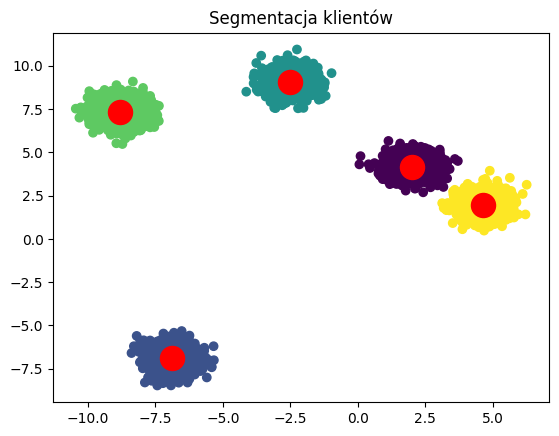

In [ ]:
# Grupowanie klientów na podstawie ich zachowań zakupowych

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

LICZBA_GRUP = 5
ILOSC_DANYCH = 5000
ROZRZUT = 0.5

# Przykładowe dane
X, y_prawdziwe = make_blobs(n_samples=ILOSC_DANYCH,
                            centers=LICZBA_GRUP,
                            cluster_std=ROZRZUT,
                            random_state=42)

# Klasteryzacja KMeans
kmeans = KMeans(n_clusters=LICZBA_GRUP, random_state=0).fit(X)

# Wizualizacja
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=300, c='red')
plt.title("Segmentacja klientów")
plt.show()

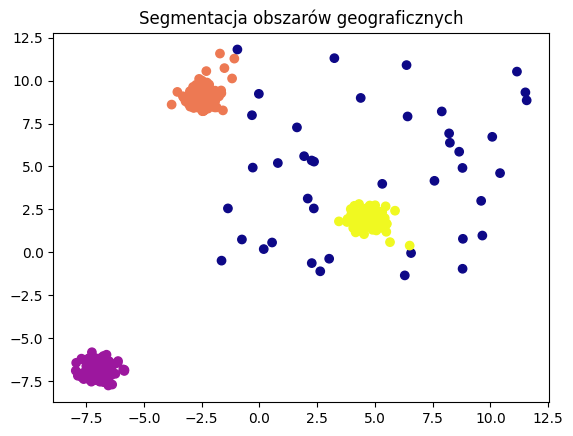

In [ ]:
# Segmentacja obszarów geograficznych w systemach GIS}
# Przykład zastosowania DBSCAN do identyfikacji gęstych obszarów geograficznych:

import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

N_SAMPLES = 400
N_NOISE = 50
EPSILON = 1
MIN_SAMPLES = 5

# Dane przestrzenne (np. współrzędne GPS)
X_blobs, _ = make_blobs(n_samples=N_SAMPLES, centers=3, cluster_std=0.4, random_state=42)
np.random.seed(42)
X_noise = np.random.uniform(low=-2, high=12, size=(N_NOISE, 2))
X = np.vstack([X_blobs, X_noise])

# DBSCAN
clustering = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES).fit(X)

# Wizualizacja wyników
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='plasma')
plt.title("Segmentacja obszarów geograficznych")
plt.show()

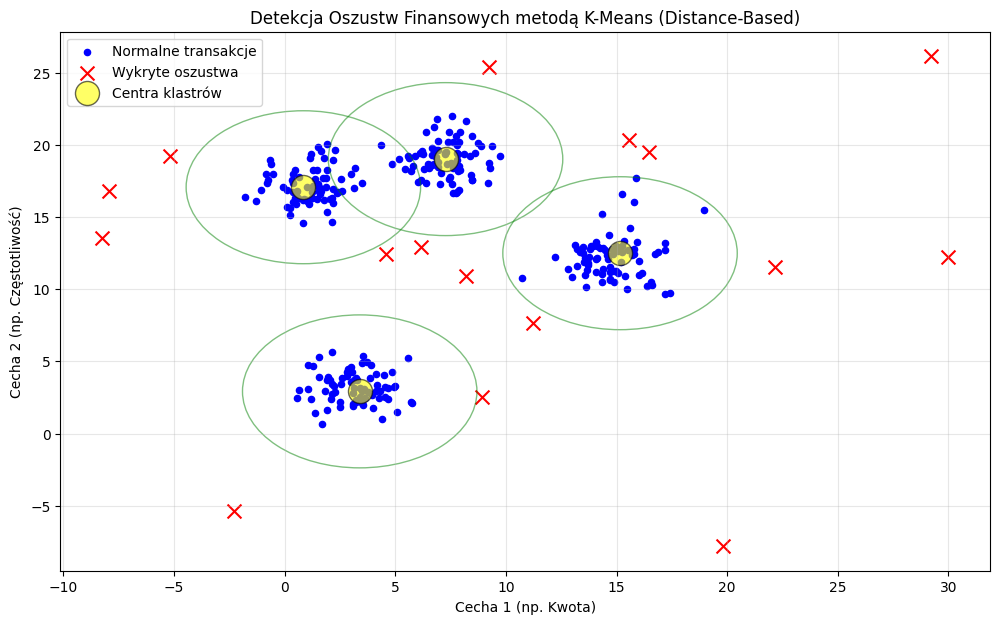

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


np.random.seed(42)


X_normal, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, center_box=(0, 20))


X_anomalies = np.random.uniform(low=-10, high=30, size=(20, 2))


X = np.vstack([X_normal, X_anomalies])


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

centra_dla_punktow = kmeans.cluster_centers_[kmeans.labels_]

dystanse = np.linalg.norm(X - centra_dla_punktow, axis=1)


procent_anomalii = 95
threshold = np.percentile(dystanse, procent_anomalii)


czy_anomalia = dystanse > threshold
anomalie_X = X[czy_anomalia]

plt.figure(figsize=(12, 7))

plt.scatter(X[~czy_anomalia][:, 0], X[~czy_anomalia][:, 1], c='blue', s=20, label='Normalne transakcje')

plt.scatter(X[czy_anomalia][:, 0], X[czy_anomalia][:, 1], c='red', s=100, marker='x', label='Wykryte oszustwa')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', edgecolors='black', alpha=0.6, label='Centra klastrów')

for center in kmeans.cluster_centers_:
    circle = plt.Circle(center, threshold, color='green', fill=False, linestyle='-', alpha=0.5)
    plt.gca().add_patch(circle)

plt.title("Detekcja Oszustw Finansowych metodą K-Means (Distance-Based)")
plt.xlabel("Cecha 1 (np. Kwota)")
plt.ylabel("Cecha 2 (np. Częstotliwość)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

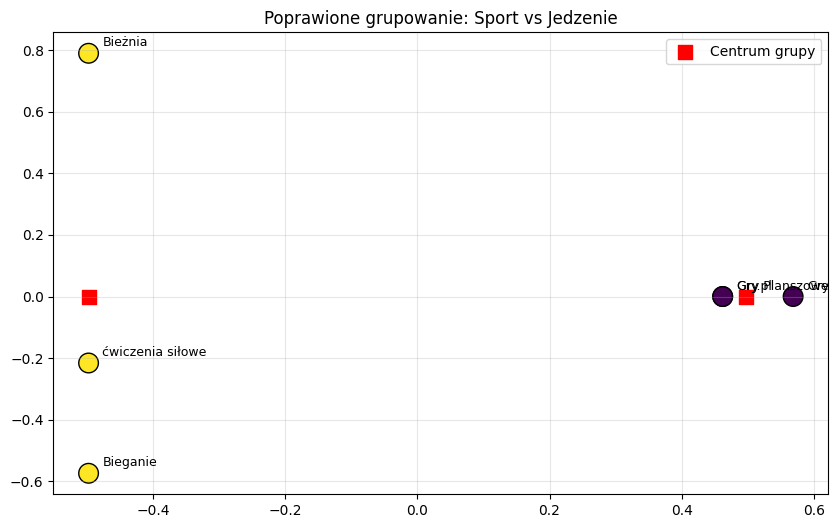

In [ ]:
# Klasyfikacja dokumentów jako etap wstępny przed klasyfikacją nadzorowaną}
#Wykorzystanie k-means do grupowania dokumentów w przestrzeni TF-IDF:

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

documents = [
    "Gry.pl",
    "Gry",
    "Gry Planszowe",
    "Bieganie",
    "ćwiczenia siłowe",
    "Bieżnia"
]

stop_words_pl = ["na", "do", "z", "o", "w", "to", "dla", "i", "a"]

vectorizer = TfidfVectorizer(stop_words=stop_words_pl)
X = vectorizer.fit_transform(documents)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components=2)
coords = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))

plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=200, edgecolors='black')

for i, txt in enumerate(documents):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]),
                 xytext=(10, 5), textcoords='offset points', fontsize=9)

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='s', label='Centrum grupy')

plt.title("Poprawione grupowanie: Sport vs Jedzenie")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()